# Sprint 3

## Importando bibliotecas

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Corrigindo a base de dados

In [102]:
df = pd.read_csv("../data/base_dados.csv")
df_base = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2973 non-null   int64  
 1   Gravidade            2973 non-null   object 
 2   Concessionaria       2973 non-null   object 
 3   Data_Ocorrencia      2973 non-null   object 
 4   Hora_Ocorrencia      2973 non-null   object 
 5   UF                   2973 non-null   object 
 6   Municipio            2973 non-null   object 
 7   Linha                2973 non-null   object 
 8   Quilômetro_Inicial   2973 non-null   float64
 9   Quilômetro_Final     2927 non-null   float64
 10  Estação_Anterior     2973 non-null   object 
 11  Estação_Posterior    2973 non-null   object 
 12  Perímetro Urbano     2973 non-null   object 
 13  Causa_direta         2973 non-null   object 
 14  Causa_contibutiva    2906 non-null   object 
 15  Natureza             2973 non-null   o

In [103]:
df.head()

,Unnamed: 0,Gravidade,Concessionaria,Data_Ocorrencia,Hora_Ocorrencia,UF,Municipio,Linha,Quilômetro_Inicial,Quilômetro_Final,...,Prefixo,Double_Stack,Serviço_Transporte,N_feridos,N_obitos,Mercadoria,Equipagem,Outra_Ferrovia,PN,Prejuízo_Financeiro
0,0,Sim,FTL,12/01/2020,16:00,PE,Jaboatao dos Guararapes,Tronco Sul Recife,5.000,5.001,...,NaN,NaN,NaN,0,0,NaN,NaN,NaN,Não,918.0
1,1,Não,FCA,12/03/2020,11:04,MG,Santo Antonio do Monte,Garças de Minas - Calafate,675.450,NaN,...,C305,Não,Cargas,0,0,Cloreto de Potássio,Rogerio Dias da Silva,NaN,Sim,NaN
2,2,Não,MRS,12/04/2020,06:35,MG,Ibirite,Variante do Paraopeba,614.996,NaN,...,KPE1101,Não,Cargas,0,0,Container Carregado de 20,MARCELINO BASILIO,NaN,Sim,NaN
3,3,Sim,FTL,12/04/2020,20:30,MA,Sao Luis,Ramal de Itaqui,30.000,NaN,...,W002,Não,Cargas,0,0,Óleos Diesel em VagõesTanque VagõesVazios de ...,MARCIO ADRIANO SANTOS NUNES,NaN,Não,NaN
4,4,Sim,FTL,12/05/2020,16:35,CE,Crateus,Tronco Norte Fortaleza,475.000,NaN,...,K107,Não,Cargas,0,0,Bobinas de Aço ou Ferro Cimento Acondicionado...,ANTONIO EGENNALES ALVES DE MIRANDA JONAEL DE ...,NaN,Sim,NaN


In [104]:
df.columns

Index(['Unnamed: 0', 'Gravidade', 'Concessionaria', 'Data_Ocorrencia',
       'Hora_Ocorrencia', 'UF', 'Municipio', 'Linha', 'Quilômetro_Inicial',
       'Quilômetro_Final', 'Estação_Anterior', 'Estação_Posterior',
       'Perímetro Urbano', 'Causa_direta', 'Causa_contibutiva', 'Natureza',
       'Interrupção', 'N_Trem', 'Prefixo', 'Double_Stack',
       'Serviço_Transporte', 'N_feridos', 'N_obitos', 'Mercadoria',
       'Equipagem', 'Outra_Ferrovia', 'PN', 'Prejuízo_Financeiro'],
      dtype='object')

In [105]:
df = df[["Data_Ocorrencia","Hora_Ocorrencia","Perímetro Urbano","Causa_direta","Causa_contibutiva","Natureza","Interrupção","N_feridos","N_obitos","Prejuízo_Financeiro"]]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Data_Ocorrencia      2973 non-null   object 
 1   Hora_Ocorrencia      2973 non-null   object 
 2   Perímetro Urbano     2973 non-null   object 
 3   Causa_direta         2973 non-null   object 
 4   Causa_contibutiva    2906 non-null   object 
 5   Natureza             2973 non-null   object 
 6   Interrupção          2973 non-null   float64
 7   N_feridos            2973 non-null   int64  
 8   N_obitos             2973 non-null   int64  
 9   Prejuízo_Financeiro  1158 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 232.4+ KB


In [107]:
df["Data"] = df["Data_Ocorrencia"] + " - " + df['Hora_Ocorrencia']
df.drop(["Data_Ocorrencia","Hora_Ocorrencia"], axis=1, inplace=True)
coluna = df.pop("Data")
df.insert(0, "Data", coluna)

In [108]:
df["Data"] = pd.to_datetime(df["Data"], format="%d/%m/%Y - %H:%M")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 2973 non-null   datetime64[ns]
 1   Perímetro Urbano     2973 non-null   object        
 2   Causa_direta         2973 non-null   object        
 3   Causa_contibutiva    2906 non-null   object        
 4   Natureza             2973 non-null   object        
 5   Interrupção          2973 non-null   float64       
 6   N_feridos            2973 non-null   int64         
 7   N_obitos             2973 non-null   int64         
 8   Prejuízo_Financeiro  1158 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 209.2+ KB


In [110]:
df.rename(columns={"Perímetro Urbano":"Perimetro_Urbano", "Causa_direta":"Causa_Direta","Causa_contibutiva":"Causa_Contributiva", "Interrupção":"Interrupcao (h)", "N_feridos":"N_Feridos","N_obitos":"N_Obitos","Prejuízo_Financeiro":"Prejuizo (R$)"}, inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                2973 non-null   datetime64[ns]
 1   Perimetro_Urbano    2973 non-null   object        
 2   Causa_Direta        2973 non-null   object        
 3   Causa_Contributiva  2906 non-null   object        
 4   Natureza            2973 non-null   object        
 5   Interrupcao (h)     2973 non-null   float64       
 6   N_Feridos           2973 non-null   int64         
 7   N_Obitos            2973 non-null   int64         
 8   Prejuizo (R$)       1158 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 209.2+ KB


In [112]:
df.head()

,Data,Perimetro_Urbano,Causa_Direta,Causa_Contributiva,Natureza,Interrupcao (h),N_Feridos,N_Obitos,Prejuizo (R$)
0,2020-01-12 16:00:00,Não,Casos Fortuitos ou de Força Maior,Animal na via,Colisão,0.0,0,0,918.0
1,2020-03-12 11:04:00,.,Casos Fortuitos ou de Força Maior,NaN,Abalroamento,0.0,0,0,NaN
2,2020-04-12 06:35:00,PN Augusto Spiazzi,Casos Fortuitos ou de Força Maior,NaN,Abalroamento,1.5,0,0,NaN
3,2020-04-12 20:30:00,Não,Falha Humana,NaN,Colisão,9.0,0,0,NaN
4,2020-05-12 16:35:00,Não,Via Permanente,NaN,Descarrilamento,28.0,0,0,NaN


In [113]:
df['Prejuizo (R$)'] = df['Prejuizo (R$)'].fillna(0)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                2973 non-null   datetime64[ns]
 1   Perimetro_Urbano    2973 non-null   object        
 2   Causa_Direta        2973 non-null   object        
 3   Causa_Contributiva  2906 non-null   object        
 4   Natureza            2973 non-null   object        
 5   Interrupcao (h)     2973 non-null   float64       
 6   N_Feridos           2973 non-null   int64         
 7   N_Obitos            2973 non-null   int64         
 8   Prejuizo (R$)       2973 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 209.2+ KB


In [115]:
df.Perimetro_Urbano.unique()

array(['Não', '.', 'PN Augusto Spiazzi', ..., 'Guarujá', 'Japeri',
       'Zona urbana de Maceió'], shape=(1102,), dtype=object)

In [116]:
df.query("Perimetro_Urbano == '.'")

,Data,Perimetro_Urbano,Causa_Direta,Causa_Contributiva,Natureza,Interrupcao (h),N_Feridos,N_Obitos,Prejuizo (R$)
1,2020-03-12 11:04:00,.,Casos Fortuitos ou de Força Maior,NaN,Abalroamento,0.0,0,0,0.0
5,2020-05-12 20:20:00,.,Casos Fortuitos ou de Força Maior,NaN,Atropelamento,0.0,1,0,0.0
12,2020-09-12 19:20:00,.,Via Permanente,NaN,Descarrilamento,12.5,0,0,0.0
39,2020-12-22 16:54:00,.,Casos Fortuitos ou de Força Maior,NaN,Atropelamento,0.0,0,1,0.0
51,2020-12-27 23:03:00,.,Casos Fortuitos ou de Força Maior,NaN,Abalroamento,0.2,0,0,0.0
56,2020-12-31 21:00:00,.,Casos Fortuitos ou de Força Maior,NaN,Abalroamento,0.0,0,1,0.0


In [117]:
df = df[df["Perimetro_Urbano"] != "."].reset_index(drop=True)

In [118]:
df['Causa_Contributiva'] = df["Causa_Contributiva"].fillna("Não Informado")

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                2967 non-null   datetime64[ns]
 1   Perimetro_Urbano    2967 non-null   object        
 2   Causa_Direta        2967 non-null   object        
 3   Causa_Contributiva  2967 non-null   object        
 4   Natureza            2967 non-null   object        
 5   Interrupcao (h)     2967 non-null   float64       
 6   N_Feridos           2967 non-null   int64         
 7   N_Obitos            2967 non-null   int64         
 8   Prejuizo (R$)       2967 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 208.7+ KB


In [120]:
df = df.sort_values("Data", ascending=True)
df

,Data,Perimetro_Urbano,Causa_Direta,Causa_Contributiva,Natureza,Interrupcao (h),N_Feridos,N_Obitos,Prejuizo (R$)
0,2020-01-12 16:00:00,Não,Casos Fortuitos ou de Força Maior,Animal na via,Colisão,0.0,0,0,918.0
1,2020-04-12 06:35:00,PN Augusto Spiazzi,Casos Fortuitos ou de Força Maior,Não Informado,Abalroamento,1.5,0,0,0.0
2,2020-04-12 20:30:00,Não,Falha Humana,Não Informado,Colisão,9.0,0,0,0.0
3,2020-05-12 16:35:00,Não,Via Permanente,Não Informado,Descarrilamento,28.0,0,0,0.0
4,2020-06-12 07:08:00,trecho corrido,Casos Fortuitos ou de Força Maior,Não Informado,Atropelamento,1.4,1,0,0.0
...,...,...,...,...,...,...,...,...,...
2962,2024-12-29 22:29:00,Não,Casos Fortuitos ou de Força Maior,Ação humana involuntária,Descarrilamento,0.0,0,0,0.0
2963,2024-12-30 07:40:00,Não,Via Permanente,Outras causas de via permanente,Descarrilamento,10.0,0,0,0.0
2964,2024-12-30 14:31:00,Não,Via Permanente,Fixação deficiente,Descarrilamento,47.5,0,0,0.0
2965,2024-12-30 14:50:00,Não,Interferência de Terceiro,"Falta de atenção à circulação (por terceiros),...",Abalroamento,0.0,0,0,0.0


In [121]:
df.to_csv("../data/base_dados_limpa.csv", index=False)

## Criando gráficos

### 1° Gráfico
Natureza X Interrupção

In [122]:
df_por_natureza = df.copy().groupby("Natureza")["Interrupcao (h)"].mean().reset_index().sort_values("Interrupcao (h)", ascending=True)
df_por_natureza

,Natureza,Interrupcao (h)
0,Abalroamento,1.138406
4,Incêndio,1.819048
1,Atropelamento,1.850104
2,Colisão,4.564865
3,Descarrilamento,12.520085


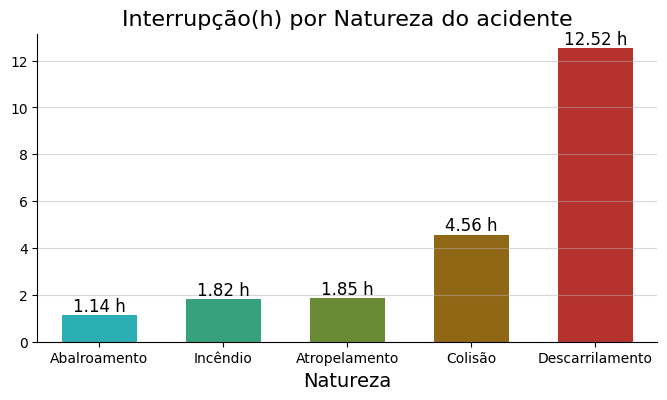

In [123]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(df_por_natureza, x="Natureza", y="Interrupcao (h)", hue="Natureza", legend=False, width=0.6, palette=["#15c2cc","#25b282","#6e9827","#a46f00","#cc1e15"])

ax.set_title("Interrupção(h) por Natureza do acidente", fontsize=16)
ax.set_xlabel("Natureza", fontsize=14)
ax.set_ylabel("")

for i, value in enumerate(df_por_natureza["Interrupcao (h)"].round(2)):
    ax.text(i, value, str(value) + " h", ha="center", va="bottom", fontsize=12)

sns.despine()
ax.grid(which="both", axis="y", alpha=0.5)

plt.savefig("../dataviz/grafico-interrupcaoXnatureza.png", dpi=300, bbox_inches="tight")

### 2° Gráfico
Numero de feridos e obitos X natureza

In [124]:
vitimas_por_natureza = df.copy()[["Natureza","N_Feridos","N_Obitos"]].groupby("Natureza").sum().T
vitimas_por_natureza["Outros"] = vitimas_por_natureza["Colisão"] + vitimas_por_natureza['Descarrilamento'] + vitimas_por_natureza["Incêndio"]
vitimas_por_natureza.pop("Colisão")
vitimas_por_natureza.pop("Descarrilamento")
vitimas_por_natureza.pop("Incêndio")
vitimas_por_natureza = vitimas_por_natureza.reset_index().melt(id_vars='index', var_name='Categoria', value_name='Valor')
vitimas_por_natureza

,index,Categoria,Valor
0,N_Feridos,Abalroamento,389
1,N_Obitos,Abalroamento,42
2,N_Feridos,Atropelamento,563
3,N_Obitos,Atropelamento,413
4,N_Feridos,Outros,50
5,N_Obitos,Outros,1


C:\Users\joaov\AppData\Local\Temp\ipykernel_8552\2963252918.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.yaxis.set_ticklabels(["Feridos","Óbitos"])


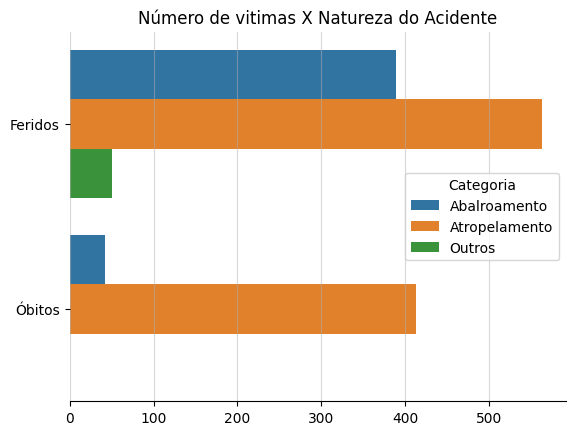

In [125]:
ax = sns.barplot(x='Valor', y='index', hue='Categoria', data=vitimas_por_natureza, orient='h', palette='tab10')

ax.set_title("Número de vitimas X Natureza do Acidente")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(which="major",axis="x", alpha=0.5)

ax.yaxis.set_ticklabels(["Feridos","Óbitos"])

sns.despine(left=True)
plt.savefig("../dataviz/grafico-vitimasXnatureza.png", dpi=300, bbox_inches="tight")

### 3° Gráfico

Causa X Interrupção

In [126]:
causa_por_interrupcao = df.copy()[["Causa_Direta","Interrupcao (h)","Data"]]
causa_por_interrupcao["Ano"] = causa_por_interrupcao['Data'].dt.year
causa_por_interrupcao.pop("Data")

0      2020-01-12 16:00:00
1      2020-04-12 06:35:00
2      2020-04-12 20:30:00
3      2020-05-12 16:35:00
4      2020-06-12 07:08:00
               ...        
2962   2024-12-29 22:29:00
2963   2024-12-30 07:40:00
2964   2024-12-30 14:31:00
2965   2024-12-30 14:50:00
2966   2024-12-31 06:30:00
Name: Data, Length: 2967, dtype: datetime64[ns]

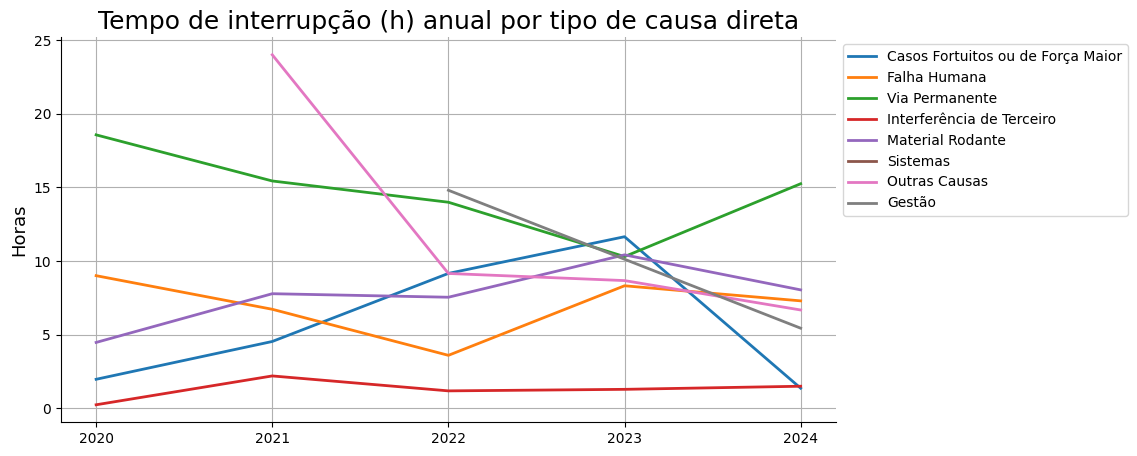

In [127]:
plt.figure(figsize=(10,5))

ax = sns.lineplot(causa_por_interrupcao, x="Ano", y="Interrupcao (h)", hue="Causa_Direta", errorbar=None, lw=2)
plt.legend(loc="best", bbox_to_anchor=(1,1))
plt.title("Tempo de interrupção (h) anual por tipo de causa direta", fontsize=18)
plt.xticks(ticks=[ano for ano in range(2020, 2025)], labels=[ano for ano in range(2020, 2025)])
plt.xlabel("")
plt.ylabel("Horas", fontsize=13)
plt.grid()

sns.despine()

plt.savefig("../dataviz/grafico-interrupcao_anualXcausa_direta.png", dpi=300, bbox_inches="tight")

### 4° Gráfico

Ocorrencias anuais X mes

In [128]:
meses = {1: "Jan", 2: "Fev", 3: "Mar", 4: "Abr", 5: "Mai", 6: "Jun",
                    7: "Jul", 8: "Ago", 9: "Set", 10: "Out", 11: "Nov", 12: "Dez"}

ocorrencias_anuais_por_mes = df.copy()
ocorrencias_anuais_por_mes["Ano"] = ocorrencias_anuais_por_mes.Data.dt.year
ocorrencias_anuais_por_mes["Mês"] = ocorrencias_anuais_por_mes.Data.dt.month
ocorrencias_anuais_por_mes = ocorrencias_anuais_por_mes[["Ano","Mês"]]
ocorrencias_anuais_por_mes = ocorrencias_anuais_por_mes.groupby(["Ano","Mês"]).size().reset_index()
ocorrencias_anuais_por_mes["Mês"] = ocorrencias_anuais_por_mes["Mês"].map(meses)
ocorrencias_anuais_por_mes = ocorrencias_anuais_por_mes[ocorrencias_anuais_por_mes['Ano'] != 2020]
ocorrencias_anuais_por_mes

,Ano,Mês,0
10,2021,Jan,48
11,2021,Fev,63
12,2021,Mar,59
13,2021,Abr,64
14,2021,Mai,59
15,2021,Jun,71
16,2021,Jul,69
17,2021,Ago,65
18,2021,Set,61
19,2021,Out,70


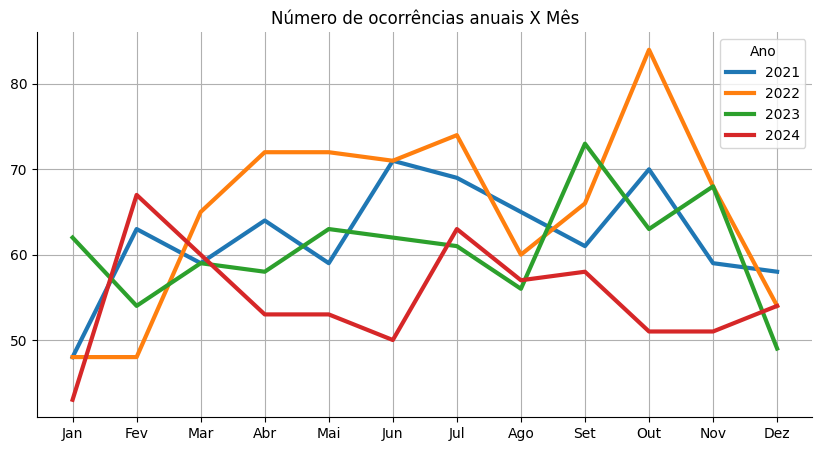

In [129]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(ocorrencias_anuais_por_mes, x="Mês", y=0, hue="Ano", palette="tab10", lw=3)
ax.set_title("Número de ocorrências anuais X Mês")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid()

sns.despine()
plt.savefig("../dataviz/grafico-ocorrencias_anuaisXmes.png", dpi=300, bbox_inches="tight")

### 5° Gráfico

Ocorrencias X causa

In [130]:
ocorrencias_por_causa = df.copy()["Causa_Direta"].value_counts().reset_index()
ocorrencias_por_causa.columns = ["Causa_Direta","Quantidade"]
ocorrencias_por_causa

,Causa_Direta,Quantidade
0,Interferência de Terceiro,2175
1,Via Permanente,497
2,Material Rodante,138
3,Casos Fortuitos ou de Força Maior,89
4,Falha Humana,47
5,Outras Causas,16
6,Gestão,4
7,Sistemas,1


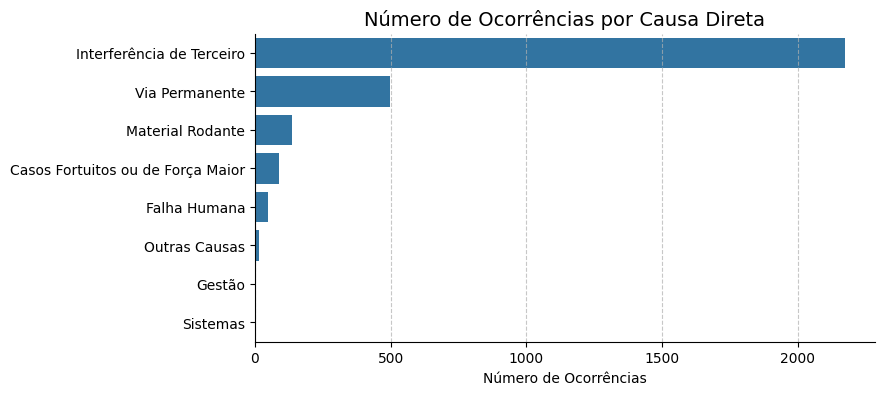

In [131]:
plt.figure(figsize=(8,4))
ax = sns.barplot(ocorrencias_por_causa, x="Quantidade", y="Causa_Direta")

ax.set_title("Número de Ocorrências por Causa Direta", fontsize=14)
ax.set_xlabel("Número de Ocorrências")
ax.set_ylabel("")
ax.grid(axis="x", linestyle="--", alpha=0.7)
sns.despine()

plt.savefig("../dataviz/grafico-ocorrenciasXcausa.png", dpi=300, bbox_inches="tight")

# Sprint 4

## Importando bibliotecas

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

## Organizando banco de dados

In [133]:
df_ml = pd.read_csv("../data/base_dados_limpa.csv")
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                2967 non-null   object 
 1   Perimetro_Urbano    2967 non-null   object 
 2   Causa_Direta        2967 non-null   object 
 3   Causa_Contributiva  2967 non-null   object 
 4   Natureza            2967 non-null   object 
 5   Interrupcao (h)     2967 non-null   float64
 6   N_Feridos           2967 non-null   int64  
 7   N_Obitos            2967 non-null   int64  
 8   Prejuizo (R$)       2967 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 208.7+ KB


In [134]:
df_ml["Data"] = pd.to_datetime(df_ml["Data"])
df_ml["Hora"] = df_ml["Data"].dt.hour

df_ml.drop("Data", axis=1, inplace=True)
df_ml = df_ml[["Causa_Direta","Natureza","Interrupcao (h)","Hora"]]
df_ml.head()

,Causa_Direta,Natureza,Interrupcao (h),Hora
0,Casos Fortuitos ou de Força Maior,Colisão,0.0,16
1,Casos Fortuitos ou de Força Maior,Abalroamento,1.5,6
2,Falha Humana,Colisão,9.0,20
3,Via Permanente,Descarrilamento,28.0,16
4,Casos Fortuitos ou de Força Maior,Atropelamento,1.4,7


In [135]:
df_ml.to_csv("../data/base_dados_ml.csv")

## Gerando o modelo de ML

In [136]:
df_model = pd.read_csv("../data/base_dados_ml.csv")
df_ml_encoded = pd.get_dummies(df_model, columns=["Causa_Direta","Natureza"], drop_first=True)

In [137]:
X = df_ml_encoded.drop("Interrupcao (h)", axis=1)
y = df_ml_encoded["Interrupcao (h)"]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [139]:
models = {
    "rf":RandomForestRegressor(),
    "gb":GradientBoostingRegressor(),
    "lr":LinearRegression()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    
print(results)
    
best_model = models[max(results)]
print(best_model)
    

{'rf': 0.041486220197498924, 'gb': 0.05586290164866148, 'lr': 0.05592154107577252}
RandomForestRegressor()


## Salvando o melhor modelo

In [140]:
pd.to_pickle(best_model, "../models/modelo_treinado.pkl")